# MAT245 Lab 8

## Curse of dimensionality - volume of a hypercube

Suppose we have a $p$-dimensional dataset containing $N$ observations that we've normalized so that all points are contained in the $p$-dimensional unit cube. Fix a target data point $x_0$, and say we send out a hypercubical neighborhood $C(x_0)$ about $x_0$ to capture a fraction $r$ of the observations. In other words, we want to consider a cubical neighbourhood of $x_0$ with volume $0 < r < 1$ (see image below for an example with $x_0 = 0$).

<img src="cube.png">

The volume of a $p$-dimensional cube with side-length $l$ is given by $l^n$, so we will have to choose the side-length of our smaller cube $C(x_0)$ to be $r^\frac{1}{p}$.

If we add the additional assumption that the points in our dataset are uniformly distributed, we can compute the median distance from the origin to the closest data point by

$$
d(p, N) = \left( 1 - \frac{1}{2^{\frac{1}{N}}}\right)^{\frac{1}{p}}.
$$

[Formula Explanation](https://stats.stackexchange.com/questions/130998/explanation-of-formula-for-median-closest-point-to-origin-of-n-samples-from-unit) for hypersphere, follows for hypercube.

#### Goals (1):

- For $p = 2, 10,$ and $100$, plot the side-length of $C(x_0)$ against the fraction of the $p$-unit cube covered by $C(x_0)$. 
- For fixed $N$, say $N = 500$, plot $p \mapsto d(p, 500)$ as $p$ ranges between $0 < p < 100$.

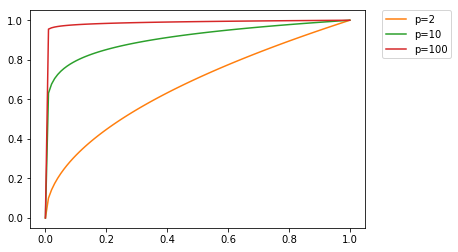

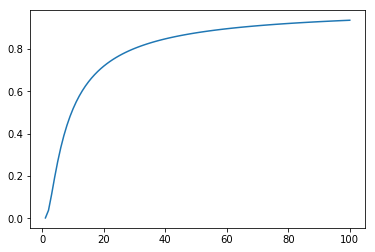

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def side_length(ratio, p):
    return np.power(ratio, 1/float(p))

def dis(p, N):
    return np.power(1- 1/float(np.power(2, 1/float(N))), 1/p)


rs = np.linspace(0, 1, num=100)
ps = np.linspace(1, 100, num=100)
ds = dis(ps, 500)

plt.figure(1)
ls = side_length(rs, 2)
plt.plot(rs, ls, 'C1', label="p=2")
ls = side_length(rs, 10)
plt.plot(rs, ls, 'C2', label="p=10")
ls = side_length(rs, 100)
plt.plot(rs, ls, 'C3', label="p=100")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

plt.figure(2)
plt.plot(ps, ds)
plt.show()
    



## Random Gaussian vectors become orthogonal in high dimension.

Suppose $Y$ and $Z$ are $p$-dimensional random vectors where each entry has been drawn from the standard normal distribution $\mathcal{N}(0, 1)$. In other words

$$
Y_i \sim \mathcal{N}(0, 1) \quad \text{and} \quad Z_i \sim \mathcal{N}(0, 1) \quad \forall i.
$$

It turns out that as $d \to \infty$, the dot product of the normalized vectors $\widehat{Y} = Y / \|Y\|$ and $\widehat{Z} = Z / \|Z\|$ tends to zero. In other words $\widehat{Y}$ and $\widehat{Z}$ become approximately orthogonal in high dimension. Our next goal is to verify this empirically. 

#### Goals (2):

- For $p = 2, 10, 100$, generate $1000$ samples of $Y$ and $Z$ and create a histogram of the resulting dot products $\widehat{Y} \cdot \widehat{Z}$.

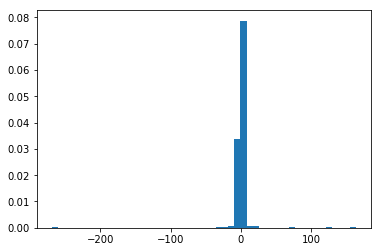

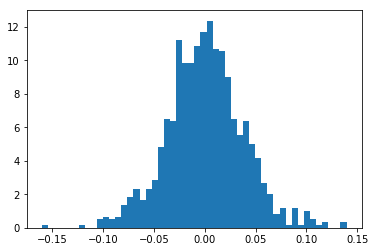

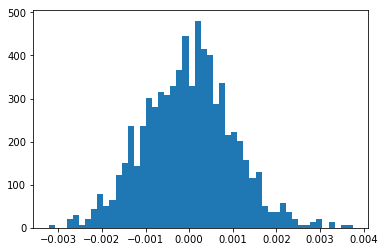

In [24]:
import numpy as np
import matplotlib.pyplot as plt

for p in [2, 10, 100]:
    s = np.array([np.random.normal(0, 1, 1000) for _ in range(0, p)])
    normed = s/np.sum((np.power(s, 2)), axis=0)
    samples = np.transpose(normed)
    
    products = [np.sum(samples[i]*samples[i+1]) for i in range(0, 999)]
    #product = np.zeros(1000000)
    #for i in range (0, 1000):
    #    for j in range(0, 1000):
    #        product[1000*i+j] = np.sum(samples[i]*samples[j]) 
    plt.figure()
    plt.hist(products, 50, normed=True)
    plt.show()

    



## Dimensionality reduction using random projections.

As we saw above, high dimensional data can cause quite a few problems. We'll now explore a few ways of reducing dimensionality. 

Suppose again that we have a $p$-dimensional dataset for large $p$, and we want to reduce the number of dimensions to $n$ for $n << p$. One way of approaching this problem is via random projections. A random projection $M$ in this case would be a $p \times n$ matrix whose entries are chosen at random. If $u \in \mathbb{R}^p$ is a point in our dataset, we compute its projection $\widehat{u} \in \mathbb{R}^n$ with the following matrix multiplication:

$$
\widehat{u} = u^T \cdot M.
$$

However, we don't want to choose just any random matrix $M$. Ideally, we would like our projection to preserve distances between points in our dataset. We can do this by choosing the matrix $M$ to be one of the following kinds:

- A **Gaussian random projection** is given by drawing the entries of $M$ from the normal distrbution $\mathcal{N}(0, 1/n)$ (recall $n$ is the dimension of the target space, also referred to as the number of components of the projection).

- An **Achlioptas random projection** is given by drawing the entries of $M_{ij}$ of $M$ according to 

$$
M_{ij} = \begin{cases}
  \sqrt{3}  \quad &\text{with probability } &\frac{1}{6} \\
  0         \quad &\text{..}                &\frac{2}{3} \\
  -\sqrt{3} \quad &\text{..}                &\frac{1}{6}.
\end{cases}
$$

If $u, v \in \mathbb{R}^p$ are points in our dataset, then projections like those above satisfy bounds of the form

$$
(1 - \epsilon) \| u - v \|^2
  \leq
\| Mu - Mv \|^2
  \leq
(1 + \epsilon) \|u - v\|^2.
$$

The relationship between the dimension $n$ of the target space, the number of samples in our dataset, and $\epsilon$ is given by

$$
 n = \frac{4\log(\text{number of samples})}{\epsilon^2/2 - \epsilon^3 /3}.
$$

Typically the number of samples is given, and so we just compute $n$ as a function of $\epsilon$. 

#### Goals (3)

- Supposing we have a $10000$-dimensional dataset with only $10$ samples, and we want $\epsilon = 0.1$, verify that the Gaussian and Achlioptas projections satisfy the bound given above (with these numbers, we need to choose $n$ > 857). 

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# for Gaussian one
# n = 4*np.log(10)/ (0.01/2 - 0.001/3)
n = 1000
M = np.random.normal(0, 1/float(np.sqrt(n)), (10000,n))

# take u v randomly as the input data
u = np.random.uniform(-1, 1, 10000).reshape(-1, 1)
v = np.random.uniform(-1, 1, 10000).reshape(-1, 1)

s1 = np.sum((u-v)**2)
print s1

U =  u.transpose().dot(M)
V =  v.transpose().dot(M)

s2 = np.sum((U-V)**2)
print s2

# never use for loop in python
"""
M = np.zeros((10000, n))
for i in range(0, 10000):
    for j in range(0, n):
        if np.random.binomial(1, float(2)/3):
            M[i,j] = 0
        elif np.random.binomial(1, float(1)/2):
            M[i,j] = np.sqrt(3/float(n))
        else:
            M[i,j] = - np.sqrt(3/float(n))
""" 
# use random choice
M = np.random.choice([np.sqrt(3/float(n)),  - np.sqrt(3/float(n)), 0], 10000*n, p=[float(1)/6,float(1)/6,float(2)/3])
M = M.reshape((10000, n))

U =  u.transpose().dot(M)
V =  v.transpose().dot(M)
s3 = np.sum((U-V)**2)
print s3

# check gaussian

if (1-0.1)*s1 < s2 and s2 < (1+0.1)*s1:
    print "Gaussian projection passed test"
    
if (1-0.1)*s1 < s3 and s3 < (1+0.1)*s1:
    print "Achlioptas projection passed test"


6728.17059349
6666.78463439
6778.86872306
Gaussian projection passed test
Achlioptas projection passed test
